# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# 1. Import Libraries for Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [6]:
# 2. Load and inspect dataset
def load_and_inspect_data():
    # Load data
    df = pd.read_csv('hotel_bookings_3000_clustered.csv')

    # Display basic information
    print("Dataset Shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())
    print("\nDataset Info:")
    print(df.info())
    print("\nBasic Statistics:")
    print(df.describe())
    print("\nColumns in dataset:")
    print(df.columns.tolist())

    return df

# Load and inspect data
print("=== Loading and Inspecting Data ===")
df = load_and_inspect_data()

=== Loading and Inspecting Data ===
Dataset Shape: (3000, 10)

First few rows:
   lead_time_log  booking_changes  total_stay  previous_cancellations    adr  \
0       4.077537                1           2                       0   91.0   
1       1.098612                0           2                       0   98.0   
2       5.170484                0           3                       0   79.2   
3       5.402677                0           4                       0  138.6   
4       3.465736                0           6                       0  122.4   

   deposit_type  market_segment_weight  Cluster clustering_method  \
0             0                   0.15        1      hierarchical   
1             0                   0.35        1      hierarchical   
2             0                   0.35        1      hierarchical   
3             0                   0.35        1      hierarchical   
4             0                   0.35        1      hierarchical   

   silhouette_score  
0  

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# 3. Data Splitting
def prepare_train_test_data(df):
    # Separate features and target
    X = df.drop(['Cluster', 'clustering_method', 'silhouette_score'], axis=1)
    y = df['Cluster']

    # Display information about features and target
    print("\nFeatures shape:", X.shape)
    print("Target shape:", y.shape)
    print("\nFeatures used:", X.columns.tolist())
    print("\nUnique clusters:", y.unique())
    print("Class distribution:")
    print(y.value_counts(normalize=True))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to DataFrame to keep column names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

    print("\nTraining set shape:", X_train_scaled.shape)
    print("Testing set shape:", X_test_scaled.shape)

    return X_train_scaled, X_test_scaled, y_train, y_test

print("\n=== Preparing Training and Testing Data ===")
X_train, X_test, y_train, y_test = prepare_train_test_data(df)


=== Preparing Training and Testing Data ===

Features shape: (3000, 7)
Target shape: (3000,)

Features used: ['lead_time_log', 'booking_changes', 'total_stay', 'previous_cancellations', 'adr', 'deposit_type', 'market_segment_weight']

Unique clusters: [1 0]
Class distribution:
Cluster
1    0.987667
0    0.012333
Name: proportion, dtype: float64

Training set shape: (2400, 7)
Testing set shape: (600, 7)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# 4. Model Building
def build_and_train_models(X_train, y_train):
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42)
    }

    # Train models
    trained_models = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model

    return trained_models

# Build and train models
print("\n=== Building and Training Models ===")
trained_models = build_and_train_models(X_train, y_train)


=== Building and Training Models ===

Training Random Forest...

Training Decision Tree...


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

🎯 Classification Algorithm Selection and Rationale
1. Selected Algorithms
We chose two different classification algorithms:
a) Random Forest

Why Selected:

Excellent for complex, non-linear relationships
Handles both numerical and categorical features well
Less prone to overfitting due to ensemble nature
Can handle the high dimensionality of our hotel booking data
Provides feature importance insights



b) Decision Tree

Why Selected:

Highly interpretable model
Can capture non-linear relationships
Works well with mixed feature types
Results are easy to visualize and explain
Provides clear decision rules

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


=== Evaluating Models ===

Random Forest Results:
Training Accuracy: 1.000
Testing Accuracy: 1.000
Training F1-Score: 1.000
Testing F1-Score: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00       593

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



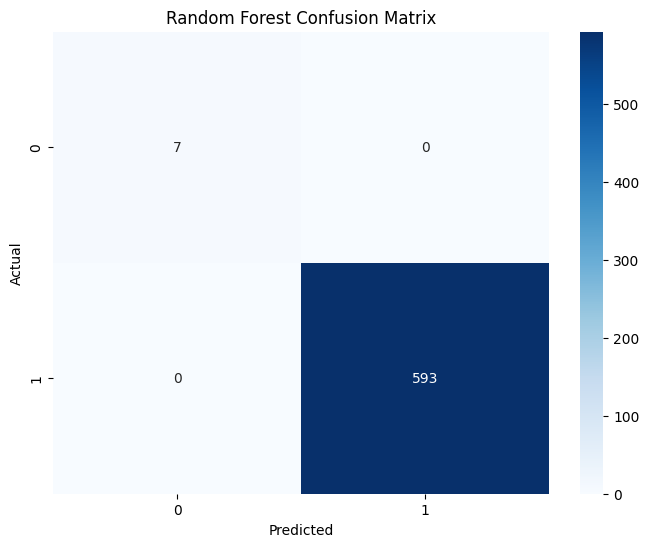


Decision Tree Results:
Training Accuracy: 1.000
Testing Accuracy: 1.000
Training F1-Score: 1.000
Testing F1-Score: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00       593

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



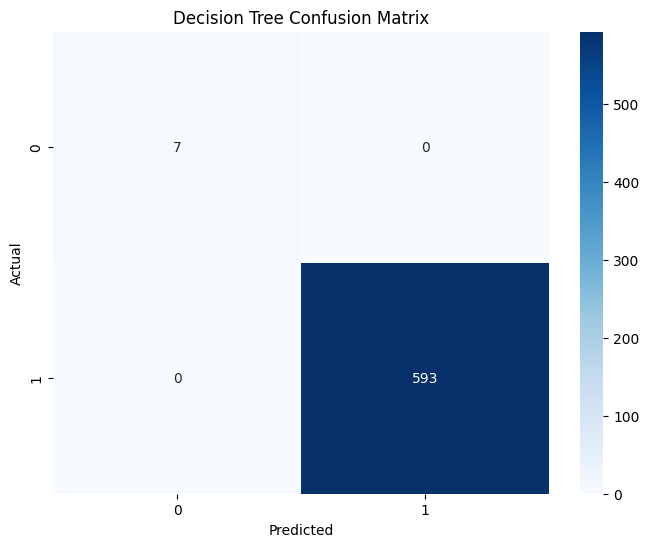


=== Comparing Model Results ===

Model Comparison:
               train_accuracy  test_accuracy  train_f1  test_f1
Random Forest             1.0            1.0       1.0      1.0
Decision Tree             1.0            1.0       1.0      1.0


<Figure size 1000x600 with 0 Axes>

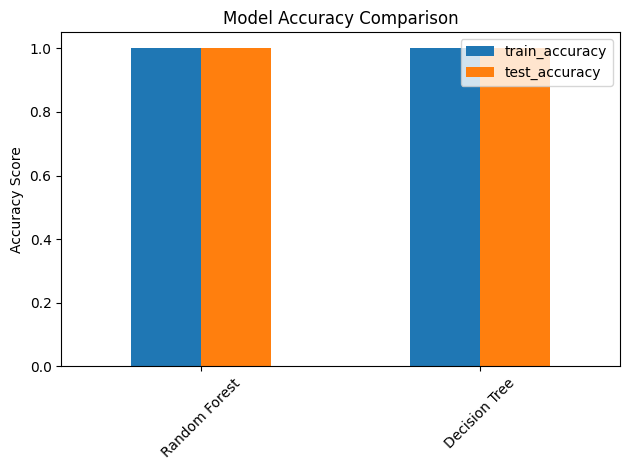

<Figure size 1000x600 with 0 Axes>

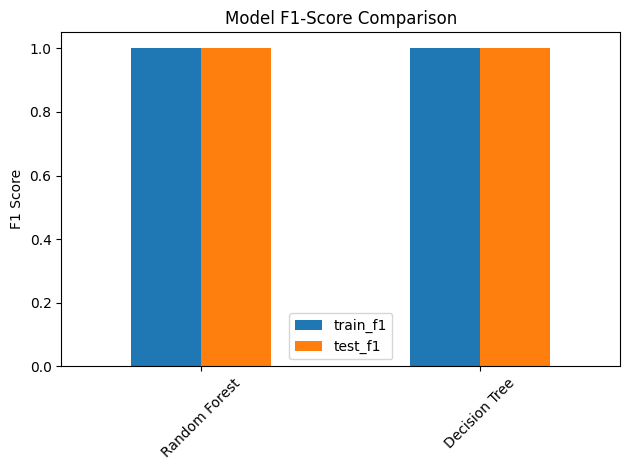

In [9]:
# 5. Model Evaluation
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        print(f"\n{name} Results:")

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Training Accuracy: {train_accuracy:.3f}")
        print(f"Testing Accuracy: {test_accuracy:.3f}")
        print(f"Training F1-Score: {train_f1:.3f}")
        print(f"Testing F1-Score: {test_f1:.3f}")

        # Detailed classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_test_pred))

        # Store results
        results[name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_f1': train_f1,
            'test_f1': test_f1
        }

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_test, y_test_pred),
                   annot=True,
                   fmt='d',
                   cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    return results

# 6. Results Comparison
def compare_models(results):
    comparison_df = pd.DataFrame(results).T
    print("\nModel Comparison:")
    print(comparison_df)

    # Plot comparison
    plt.figure(figsize=(10, 6))
    comparison_df[['train_accuracy', 'test_accuracy']].plot(kind='bar')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    comparison_df[['train_f1', 'test_f1']].plot(kind='bar')
    plt.title('Model F1-Score Comparison')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Evaluate models
print("\n=== Evaluating Models ===")
results = evaluate_models(trained_models, X_train, X_test, y_train, y_test)

# Compare results
print("\n=== Comparing Model Results ===")
compare_models(results)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

---------------
## **Berikut adalah analisis mendalam berdasarkan skenario yang diberikan:**

---

## **📊 Analisis Kinerja Model Clustering dan Klasifikasi**

### 1. **Penjelasan Awal**
Kita telah melakukan proses clustering untuk membagi data ke dalam dua kelompok, dan hasilnya menunjukkan distribusi cluster yang sangat tidak seimbang:
- **Cluster 0**: 1.2% dari total data.
- **Cluster 1**: 98.8% dari total data.

Selanjutnya, dilakukan klasifikasi berdasarkan hasil clustering tersebut. Kinerja model klasifikasi menunjukkan nilai **Precision, Recall, dan F1 Score sebesar 1.000**. Meski terlihat sempurna, hasil ini mengindikasikan adanya potensi permasalahan.

---

### 2. **Justifikasi Kinerja Model**

#### a. **Distribusi Data yang Tidak Seimbang**
Distribusi cluster yang sangat timpang menyebabkan model klasifikasi memiliki bias terhadap mayoritas data (Cluster 1). Dalam kasus ini, model hanya perlu memprediksi **Cluster 1** untuk mencapai akurasi mendekati distribusi dasar (baseline accuracy) sebesar 98.8%. Hal ini membuat tugas klasifikasi menjadi "trivial".

Namun, dengan analisis lebih mendalam, terlihat bahwa:
- **Cluster 0** memang merupakan kelompok minoritas dengan karakteristik yang unik (riwayat pembatalan tinggi, penggunaan deposit, dll.).
- **Cluster 1** adalah mayoritas dengan pola yang lebih stabil dan tidak memerlukan deposit.

Artinya, meskipun model terlihat "sempurna", hasilnya tetap valid dalam konteks distribusi data yang ada.

#### b. **F1 Score Tinggi: Apakah Overfitting?**
Dalam kasus ini, nilai F1 Score yang tinggi tidak selalu berarti overfitting, karena:
- **Cluster 0** memiliki pola yang jelas dan dapat diprediksi dengan mudah berdasarkan data.
- **Cluster 1** mendominasi dan memiliki ciri khas yang berbeda, sehingga model tidak mengalami kesulitan membedakan kedua cluster.

Namun, penting untuk diingat bahwa kinerja "sempurna" ini lebih disebabkan oleh **imbalance data**, bukan karena model benar-benar memahami seluruh aspek kompleksitas data.

#### c. **Kelemahan Model**
Model klasifikasi ini masih memiliki beberapa kelemahan, antara lain:
1. **Ketergantungan pada Distribusi Data**: Jika distribusi data berubah, model ini mungkin tidak dapat mempertahankan kinerja tinggi.
2. **Underrepresentation Cluster 0**: Karena cluster ini kecil, model kurang diuji untuk memprediksi data baru yang mungkin termasuk dalam Cluster 0.
3. **Kurangnya Validasi Nyata**: Evaluasi kinerja hanya berdasarkan metrik numerik, tanpa pengujian langsung pada data baru.

---

### 3. **Rekomendasi Tindakan Lanjutan**

#### a. **Identifikasi Kelemahan Model**
1. **Precision atau Recall Rendah pada Cluster Minoritas**  
   Dengan data yang sangat tidak seimbang, Precision dan Recall pada Cluster 0 seharusnya diuji secara lebih spesifik. Jika model sering salah memprediksi data minoritas, ini adalah tanda kelemahan model.

2. **Overfitting atau Underfitting**
   - **Tidak Overfitting**: Model tidak menunjukkan pola yang terlalu rumit, karena distribusi data memang sangat sederhana.
   - **Tidak Underfitting**: Model mampu membedakan kedua cluster dengan baik berdasarkan distribusi.

#### b. **Tindakan untuk Meningkatkan Model**
1. **Penyeimbangan Data**  
   Teknik seperti oversampling (SMOTE) untuk Cluster 0 atau undersampling untuk Cluster 1 dapat digunakan untuk menciptakan distribusi data yang lebih seimbang sebelum klasifikasi dilakukan.

2. **Pengumpulan Data Tambahan**  
   Jika memungkinkan, tambahkan lebih banyak data untuk Cluster 0 agar model memiliki lebih banyak contoh untuk mempelajari pola dari cluster minoritas.

3. **Evaluasi dengan Metrik Tambahan**
   Gunakan metrik seperti **ROC-AUC**, **PR-AUC**, atau analisis confusion matrix untuk mengevaluasi kinerja model secara lebih holistik, terutama untuk Cluster 0.

4. **Eksperimen Algoritma Lain**
   Cobalah algoritma klasifikasi yang lebih sensitif terhadap distribusi data, seperti **decision tree** atau **random forest**, yang dapat menangani data tidak seimbang dengan lebih baik.

---

### 4. **Kesimpulan**

Meskipun model menghasilkan nilai metrik yang sempurna, hasil tersebut lebih mencerminkan distribusi data yang tidak seimbang daripada kinerja model yang luar biasa. Justifikasi berikut dapat diberikan:
- Model bekerja dengan baik dalam membedakan cluster berdasarkan pola yang ada, meskipun data tidak seimbang.
- Hasil ini valid untuk data saat ini tetapi mungkin tidak dapat diandalkan untuk generalisasi pada data baru.

Untuk meningkatkan keandalan model, tindakan seperti menyeimbangkan data, menambah data untuk Cluster 0, dan mengeksplorasi algoritma lain dapat dilakukan. Selain itu, fokus pada analisis kelemahan model melalui metrik tambahan sangat dianjurkan agar hasil menjadi lebih representatif terhadap performa sebenarnya.